In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels import api
from pickle import dump

## 1.Loading Data

In [2]:
data = pd.read_csv('Datasets/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 2.Data Analysis

In [3]:
data.shape

(30, 2)

In [4]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

## 4. Train test spliting

In [4]:
train = data.iloc[:15,:]
print(train.shape)
print(train.tail())
test = data.iloc[15:,:]
print(test.shape)
print(test.head())

(15, 2)
    YearsExperience   Salary
10              3.9  63218.0
11              4.0  55794.0
12              4.0  56957.0
13              4.1  57081.0
14              4.5  61111.0
(15, 2)
    YearsExperience   Salary
15              4.9  67938.0
16              5.1  66029.0
17              5.3  83088.0
18              5.9  81363.0
19              6.0  93940.0


## 5. Assumption Check
### 5.1 Linearity Check

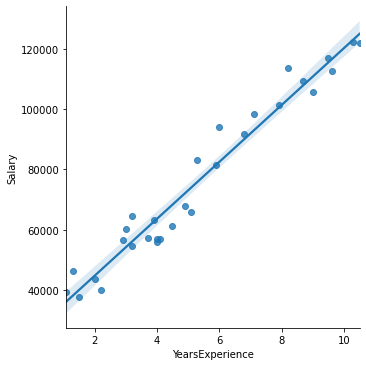

In [6]:
sns.lmplot(x='YearsExperience',y='Salary',data=data)
plt.show()
#the relation seems linear

In [7]:
data.corr()
# salary and YesrsExperiance is 97.82 % positively strogly related

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Checking for outliers

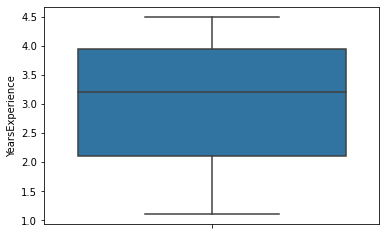

In [5]:
sns.boxplot(y='YearsExperience',data=train)
plt.show()
#no outliers

## 6.Model Building and training

In [8]:
salary_predc_model = ols(formula='Salary~YearsExperience',data=train).fit()

## 7.Model testing and evalution using train data

In [9]:
y_train_pred = salary_predc_model.predict(train)

In [10]:
salary_predc_model.rsquared

0.702075518341867

In [11]:
salary_predc_model.resid.mean()

-1.4551915228366852e-11

## 8.1 Residual Normality check

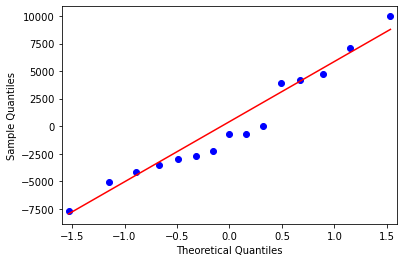

In [12]:
api.qqplot(salary_predc_model.resid,line='q')
plt.show()

# points are not falling on the line

## 8.2 Homoscedasticity check

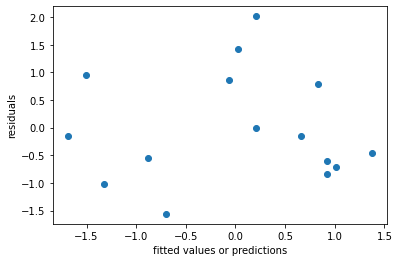

In [13]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(salary_predc_model.fittedvalues),get_standardized_values(salary_predc_model.resid))
plt.xlabel('fitted values or predictions')
plt.ylabel('residuals')
plt.show()

#variance is not constant

## 9.Model testing and evaluation using test data

In [14]:
y_test_pred = salary_predc_model.predict(test)

In [15]:
salary_predc_model.rsquared

0.702075518341867

In [16]:
salary_predc_model.resid.mean()

-1.4551915228366852e-11

## 10.Model Deployment

In [17]:
dump(salary_predc_model,open('salary_prediction.pkl','wb'))

**Linear algorithm is not the best fit for this data, as r square is just 70%**

### Regressor vs reggression

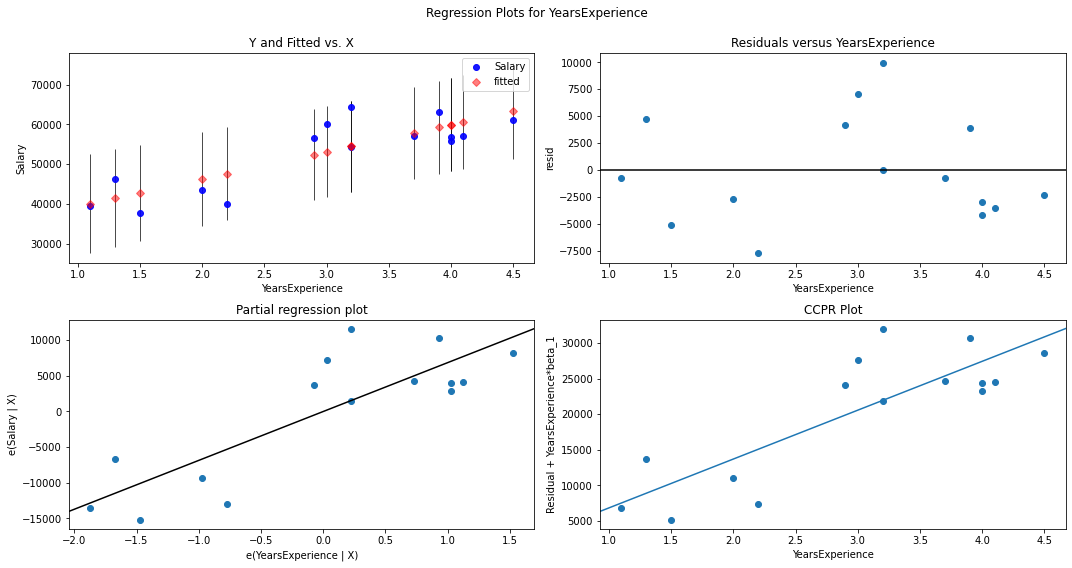

In [20]:
# Regression vs 'YearsExperience'
#enog is y
#exog is x
fig = plt.figure(figsize=(15,8))
fig = api.graphics.plot_regress_exog(salary_predc_model,'YearsExperience',fig=fig)
#plot1 is exog vs edog, i.e YearsExperience vs salary which should be linear
#plot2 is exog vs residuals, which should be with equal variance
#plot3 is exog vs fitted or predicted values
#plot4 is exog vs fitted values plus residuals